In [ ]:
!pip install hmmlearn
!pip install -U PyYAML


     |████████████████████████████████| 374 kB 5.5 MB/s 
     |████████████████████████████████| 636 kB 4.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


La descarga de datos para el ejemplo se puede realizar desde el siguiente link:

https://finance.yahoo.com/quote/SPY/history?p=SPY

Model Score: 4349.121919230776


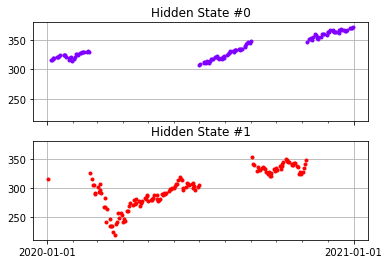

In [ ]:
from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns


def obtain_prices_df(csv_filepath, end_date):
    """
    """
    df = pd.read_csv(
        csv_filepath, header=0,
        names=[
            "Date", "Open", "High", "Low", 
            "Close", "Adj Close", "Volume"
        ],
        index_col="Date", parse_dates=True
    )
    df["Returns"] = df["Adj Close"].pct_change()
    df = df[:end_date.strftime("%Y-%m-%d")]
    df.dropna(inplace=True)
    return df


def plot_in_sample_hidden_states(hmm_model, df):
    """
    """
    hidden_states = hmm_model.predict(rets)
    fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Adj Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()


if __name__ == "__main__":
    warnings.filterwarnings("ignore")


    csv_filepath = "/content/drive/MyDrive/BME/BME_CLASES/MIAX/BME PGM/SPY.csv"
    end_date = datetime.datetime(2019, 12, 31)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"]])
 
    hmm_model = GaussianHMM(
        n_components=2, covariance_type="full", n_iter=100000).fit(rets)
    print("Model Score:", hmm_model.score(rets))
  
    end_date = datetime.datetime(2020, 12, 31)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"].iloc[-252:]])
    plot_in_sample_hidden_states(hmm_model, spy.iloc[-252:,:])